<a href="https://colab.research.google.com/github/Thiago-Reis-Porto/Python-repository/blob/main/AED3_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>TRABALHO ALGORITMO APROXIMATIVO AED3</center>

<h1><center>Thiago Reis Porto</center></h1>

**Bibliotecas**

In [ ]:
import numpy as np
import sys 
import itertools 
import random
import bisect
import time
import matplotlib.pyplot as plt

**Utilitários** 

In [ ]:
#-------------------------------------------------------------------------------
# Create a graph from the tsp files
#-------------------------------------------------------------------------------
def creatArray(fileName):
        fileObj = open(fileName, "r") #opens the file in read mode
        #words = fileObj.readlines()
        array = np.loadtxt(fileObj, dtype='i')
        fileObj.close()
        return array
#-------------------------------------------------------------------------------
# execute function and get time execution
#-------------------------------------------------------------------------------
def execTime(t, f, *args):
  start = time.time()
  f(*args)
  end = time.time()
  elapsed = end-start
  t.append(elapsed)
#-------------------------------------------------------------------------------
# Show Figure of execution time
#-------------------------------------------------------------------------------
def showFigure(naive,dynamic,heuristic):

  plt.figure(figsize=(10,10))
  plt.scat([1,2],naive)
  plt.plot([1,2,3],dynamic)
  plt.plot([1,2,3,4,5],heuristic)
  plt.title("Execution time of tsp samples")
  plt.xlabel("Tsp (x)")
  plt.ylabel("Exec. Time(s)")
  plt.grid()
  plt.legend(["Naive","Dynamic","Heuristic"])
  plt.xticks(range(1,6))
  plt.show
#-------------------------------------------------------------------------------
# Show Figure of heuristic solutions
#-------------------------------------------------------------------------------
def showHeurSolutions(sol):
  plt.figure(figsize=(10,10))
  tspS = [253,1248,1194,7013,27603]
  plt.plot([1,2,3,4,5],tspS)
  plt.plot([1,2,3,4,5],sol)
  plt.title("Solutions comparasion")
  plt.xlabel("Tsp (x)")
  plt.ylabel("Solution")
  plt.grid()
  plt.legend(["Optimal Solution", "Heuristic"])
  plt.xticks(range(1,6))
  plt.show


**Arquivos do drive**

**Caminho dos Grafos TSP para teste:**

In [ ]:
root_path = "drive/My Drive/Colab Notebooks/TSP"
tsp1 = root_path+"/tsp1_253.txt"
tsp2 = root_path+"/tsp2_1248.txt"
tsp3 = root_path+"/tsp3_1194.txt"
tsp4 = root_path+"/tsp4_7013.txt"
tsp5 = root_path+"/tsp5_27603.txt"


**Algoritmo de TSP simples(NAIVE)**

---

Uma tentativa "simples" de resolução do problema, aqui realizamos uma permutação (n-1)! com os vértices(com exceção da origem), sendo n o número de vértices do grafo, e então calculamos o custo de cada ciclo hamiltoniano baseado nestas permutações começando e terminando em um mesmo vértice arbitrário e passando apenas uma vez pelos outros vértices), o ciclo com o menor custo é a resposta.


**Complexidade de tempo:** CodeCogsEqn.gif

Só é viável para grafos muito pequenos, em geral é extremamente lento, algoritmos com complexidade fatorais são ainda piores que a maioria dos exponenciais(Uma compledade exponencial CodeCogsEqn (3).gif seria ainda pior).


In [ ]:
def tspNaive(graph, s):
    V = len(graph[0]) # Lenght of graph
    # Store all vertex apart from source vertex
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)
 
    # Store minimum weight Hamiltonian Cycle
    min_cost = sys.maxsize
    p = itertools.permutations(vertex)
    
    for i in p:
        cost = 0
        # Current path weight cost
        k = s
       
        for j in i:
            cost += graph[k][j]
            k = j
        cost += graph[k][s]
 
        # Update minimum
        if (cost < min_cost):
           min_cost = min(min_cost, cost)
           C =  i
    # tuple whith min cost and the cicle
    print( [s]+list(C)+[s], min_cost )

**Algortmo de TSP em Programação dinamica**

Uma abordagem um pouco mais interessante que uma solução “naive” é através da programação dinâmica e memoização, onde se realiza a troca de espaço por tempo, guardando na memória as soluções de subproblemas, que no final serão utilizadas para resolver o problema maior, aqui o que queremos é guardar os menores ciclos hamiltonianos entre os vértices, começa se com um ciclo de tamanho 2 e vai se construindo ciclos maiores, de forma que no final ficamos com o menor ciclo hamiltoniano entre todos os vértices, tive dificuldade de encontrar uma forma que me agradasse para guardar os ciclos na memória, mas acabei encontrando uma implementação legal que utiliza uma codificação em bits para os vértices(Fonte no final junto com as outras referências).

Complexidade de tempo: CodeCogsEqn (7).gif

Complexidade de espaço: CodeCogsEqn (6).gif

Já é bem melhor que uma abordagem naive, mas ainda é um algorítimo exponencial e ainda temos um custo elevado de memória.


In [ ]:
def held_karp(dists):
   
    n = len(dists)

    # Maps each subset of the nodes to the cost to reach that subset, as well
    # as what node it passed before reaching this subset.
    # Node subsets are represented as set bits.
    C = {}

    # Set transition cost from initial state
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0][k], 0)

    # Iterate subsets of increasing length and store intermediate results
    # in classic dynamic programming manner
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            # Set bits for all nodes in this subset
            bits = 0
            for bit in subset:
                bits |= 1 << bit

            # Find the lowest cost to get to this subset
            for k in subset:
                prev = bits & ~(1 << k)

                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev, m)][0] + dists[m][k], m))
                C[(bits, k)] = min(res)

    # We're interested in all bits but the least significant (the start state)
    bits = (2**n - 1) - 1

    # Calculate optimal cost
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k][0], k))
    opt, parent = min(res)

    # Backtrack to find full path
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits

    # Add implicit start state
    path.append(0)

    print(list(reversed(path))+[0], opt)

**Algortmo de TSP com Heurística**

Existem uma quantidade muito grande de algorítimos que resolvem TSP de forma aproximada, aqui por questão de praticidade foi escolhida uma abordagem muito simples, geramos uma MST do grafo, aqui utilizei o algoritmo Prim e então realizei uma busca  por profundidade para pegar os vértices em pré-ordem, e calculei o ciclo, somando ainda um caminho do último vértice para o primeiro. Certamente não é a abordagem mais eficiente, mas resolve o problema de forma razoável.

Complexidade de tempo: CodeCogsEqn (9).gif

Aqui só considerei no calculo o pior caso de prim, mas basicamente é muito mais rápido que os algoritmos que dão as soluções exatas, o que o torna, apesar da imprecisão, uma opção viável para grafos grandes.

In [ ]:
#-------------------------------------------------------------------------------
# Create an MST from a graph
#-------------------------------------------------------------------------------
def prim(G):
  # Prim's Algorithm in Python
  mst = []
  for i in range(len(G)):
    mst.append([])
  INF = 9999999

  # number of vertices in graph
  V = len(G)
  
  # create a array to track selected vertex
  # selected will become true otherwise false
  selected = [0]*len(G)
  # set number of edge to 0
  no_edge = 0
  # the number of egde in minimum spanning tree will be
  # always less than(V - 1), where V is number of vertices in
  # graph
  # choose 0th vertex and make it true
  selected[0] = True
  # print for edge and weight
  #print("Edge : Weight\n")
  while (no_edge < V - 1):
      # For every vertex in the set S, find the all adjacent vertices
      #, calculate the distance from the vertex selected at step 1.
      # if the vertex is already in the set S, discard it otherwise
      # choose another vertex nearest to selected vertex  at step 1.
      minimum = INF
      x = 0
      y = 0
      for i in range(V):
          if selected[i]:
              for j in range(V):
                  if ((not selected[j]) and G[i][j]):  
                      # not in selected and there is an edge
                      if minimum > G[i][j]:
                          minimum = G[i][j]
                          x = i
                          y = j
      
     # if mst[x] == []:
      mst[x].append(y)
      #else :
      #  bisect.insort(mst[x], y)
           
      #print(str(x) + "-" + str(y) + ":" + str(G[x][y]))
      selected[y] = True
      no_edge += 1

  return mst 
#-------------------------------------------------------------------------------

#-------------------------------------------------------------------------------
# DSF search on an mst (in an array abstraction: each node is an 
# list of edges) to get a path
#-------------------------------------------------------------------------------
def dsfMST(mst, i, j, g, p):
  if mst[i] == []:
    return
 
  while mst[i] != []:
    p[0].append(mst[i][0])
    p[1]= p[1] + g[j[0]][mst[i][0]]
    
    j[0] = mst[i][0]
    mst[i].remove(j[0])
    
    dsfMST(mst, j[0], j, g, p )
  return
#------------------------------------------------------------------------------- 

#-------------------------------------------------------------------------------
# Get an hamiltonian cycle from a path from a dsf search, adding the last path to 
# the origin vertex
#-------------------------------------------------------------------------------
def heuTSP(G):
  mst = prim(G)
  p=[[0],0]
  v = [0]
  dsfMST(mst, 0, v, G, p)
  p[0].append(0)
  p[1] = p[1] + G[v[0]][0]
  print(p)
#-------------------------------------------------------------------------------

**Testes**

**Naive:**

tsp 1,2 = ok

tsp 3,4,5 = n/a

In [ ]:
naiveT = []

In [ ]:
g = creatArray(tsp1)
execTime(naiveT,tspNaive,g,0)

[0, 7, 4, 3, 9, 5, 2, 6, 1, 10, 8, 0] 253


In [ ]:
g = creatArray(tsp2)
execTime(naiveT,tspNaive,g,0)

[0, 1, 2, 3, 4, 5, 0] 1248


In [ ]:
g = creatArray(tsp3)
execTime(naiveT,tspNaive,g,0)

In [ ]:
g = creatArray(tsp4)
execTime(naiveT,tspNaive,g,0)

In [ ]:
g = creatArray(tsp5)
execTime(naiveT,tspNaive,g,0)

In [ ]:
naiveT

[31.63322687149048, 0.0009291172027587891]

**Held Karp/Prog Dinâmica**

tsp 1,2,3 = ok

tsp 4, 5 = n/a (inclusive com estouro de memoria)


In [ ]:
hkTime = []

In [ ]:
g = creatArray(tsp1)
execTime(hkTime,held_karp,g)

[0, 8, 10, 1, 6, 2, 5, 9, 3, 4, 7, 0] 253


In [ ]:
g = creatArray(tsp2)
execTime(hkTime,held_karp,g)

[0, 5, 4, 3, 2, 1, 0] 1248


In [ ]:
g = creatArray(tsp3)
execTime(hkTime,held_karp,g)

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 0] 1194


In [ ]:
g = creatArray(tsp4)
execTime(hkTime,held_karp,g)

In [ ]:
g = creatArray(tsp5)
execTime(hkTime,held_karp,g)

In [ ]:
hkTime

[0.03226327896118164, 0.0017313957214355469, 1.0272243022918701]

**Heuristica MST**

tsp 1,2,3,4 = ok (Sem solução otima)

In [ ]:
heurTime = []

In [ ]:
g = creatArray(tsp1)
execTime(heurTime,heuTSP,g)

[[0, 8, 7, 2, 10, 1, 6, 4, 3, 5, 9, 0], 269]


In [ ]:
g = creatArray(tsp2)
execTime(heurTime,heuTSP,g)

[[0, 1, 5, 4, 3, 2, 0], 1272]


In [ ]:
g = creatArray(tsp3)
execTime(heurTime,heuTSP,g)

[[0, 2, 3, 4, 8, 7, 5, 6, 14, 13, 12, 11, 10, 9, 1, 0], 1424]


In [ ]:
g = creatArray(tsp4)
execTime(heurTime,heuTSP,g)

[[0, 7, 22, 21, 43, 16, 1, 2, 23, 24, 38, 3, 17, 25, 39, 29, 15, 12, 13, 34, 14, 4, 26, 36, 35, 11, 6, 5, 28, 27, 19, 20, 41, 42, 18, 9, 8, 10, 32, 30, 31, 40, 33, 37, 0], 9551]


In [ ]:
g = creatArray(tsp5)
execTime(heurTime,heuTSP,g)

[[0, 1, 5, 4, 3, 7, 11, 12, 13, 16, 17, 18, 14, 21, 22, 20, 28, 27, 25, 19, 15, 24, 26, 23, 9, 10, 6, 8, 2, 0], 34902]


In [ ]:
heurTime

[0.0019762516021728516,
 0.0010306835174560547,
 0.002268552780151367,
 0.015840530395507812,
 0.004861116409301758]

**Grafico tempo de execução:**

Sem valores para tsp3, tsp4, tsp5, para o algoritmo Naive

Sem valores para tsp4, tsp5, para o algoritmo Held Karp

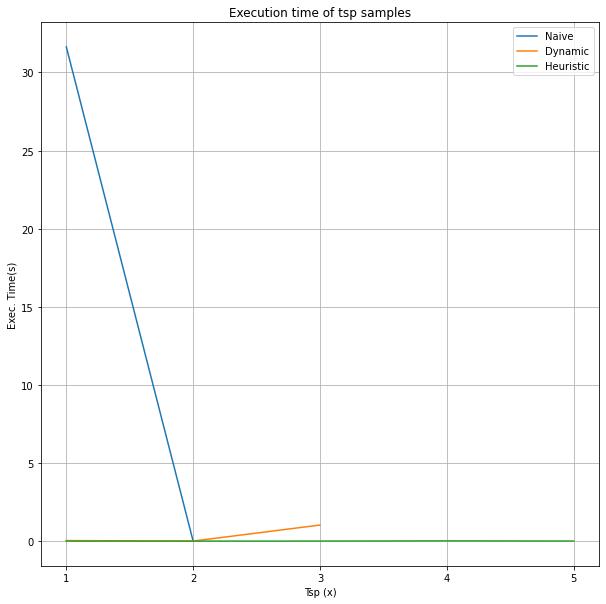

In [ ]:
showFigure(naiveT,hkTime,heurTime)

Diferença entre as soluções da heurística e a solução ótima:


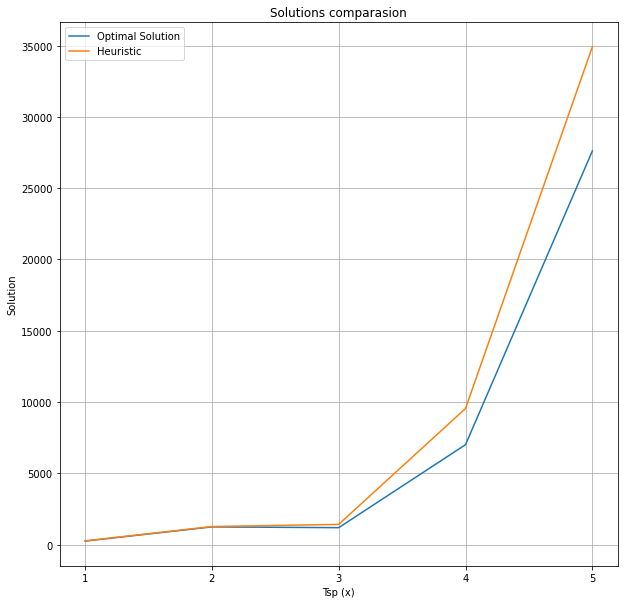

In [ ]:
showHeurSolutions([269,1272,1424,9551,34902])

**Conclusão:**

De acordo com os testes, nos grafos com uma tamanho razoável(tsp3 possui 15 vértices, tsp4 44 e tsp5 29) solução ótimas já são um problema, programação dinâmica(held karp) teve um desempenho um pouco melhor que a solução naive, executou as amostras 1,2, e 3 com baixo tempo de execução, mas ja houve um problema com 29 vértices inclusive com um estouro de memória, então não resolve muita coisa, ja a solução com a heurística utilizando MST que apesar de não achar a solução ótima, consegue resolver o problema em um tempo de execução rápido, o que geralmente basta, acredito que é melhor encontrar uma solução, mesmo que não seja a exata, do que não ter solução nenhuma.


**Referencias:**

Leituras sobre tsp e algoritmos ultizados/baseados:

https://towardsdatascience.com/solving-tsp-using-dynamic-programming-2c77da86610d

https://medium.com/hackernoon/yats-yet-another-tsp-solution-6a71aeabe1f8

https://www.geeksforgeeks.org/travelling-salesman-problem-set-1/

https://en.wikipedia.org/wiki/Held–Karp_algorithm

Algoritimo naive:

https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/

Held Karp: 

https://github.com/CarlEkerot/held-karp/blob/master/held-karp.py

MST prim:

https://www.programiz.com/dsa/prim-algorithm



